<a href="https://colab.research.google.com/github/Illoizaur/Team1_Berezin-Andrusiak/blob/main/FirstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Good

## Data analysation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

pd.set_option('display.max_columns', 100)

train = pd.read_csv('/content/drive/Shareddrives/mfai/basic_AI/basic_AI/Good/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/mfai/basic_AI/basic_AI/Good/test.csv')

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [3]:
train.shape

(8693, 14)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train.drop_duplicates()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


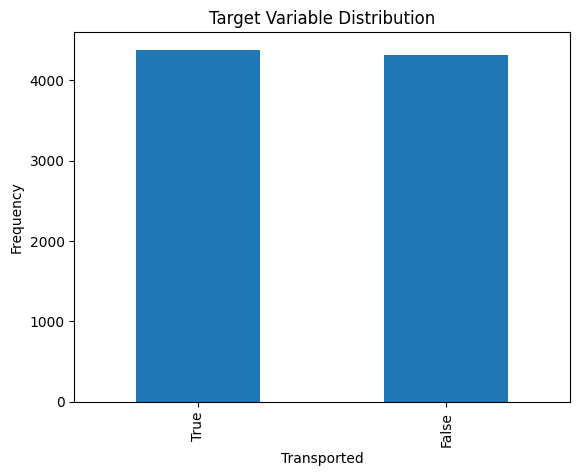

In [ ]:
import matplotlib.pyplot as plt

train.Transported.value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Transported')
plt.ylabel('Frequency')
plt.show()

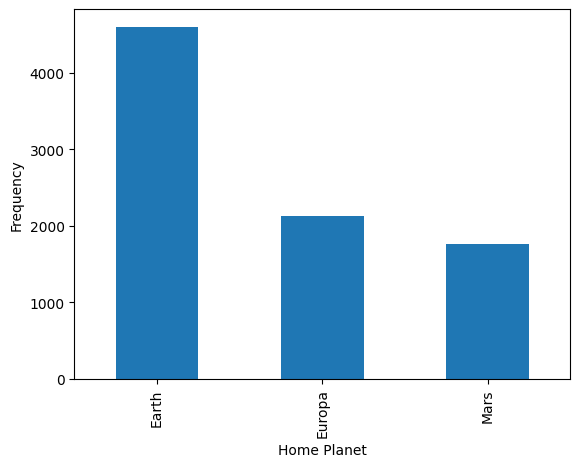

In [ ]:
train.HomePlanet.value_counts().plot(kind='bar')
plt.xlabel('Home Planet')
plt.ylabel('Frequency')
plt.show()

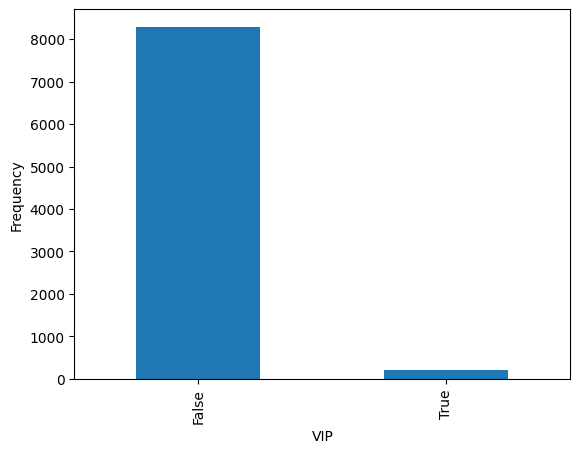

In [ ]:
train.VIP.value_counts().plot(kind='bar')
plt.xlabel('VIP')
plt.ylabel('Frequency')
plt.show()

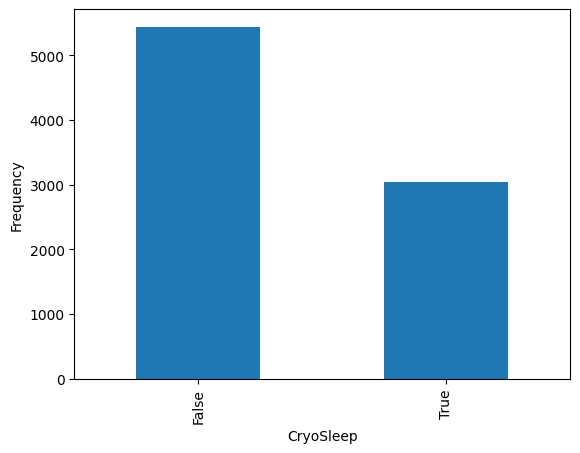

In [ ]:
train.CryoSleep.value_counts().plot(kind='bar')
plt.xlabel('CryoSleep')
plt.ylabel('Frequency')
plt.show()

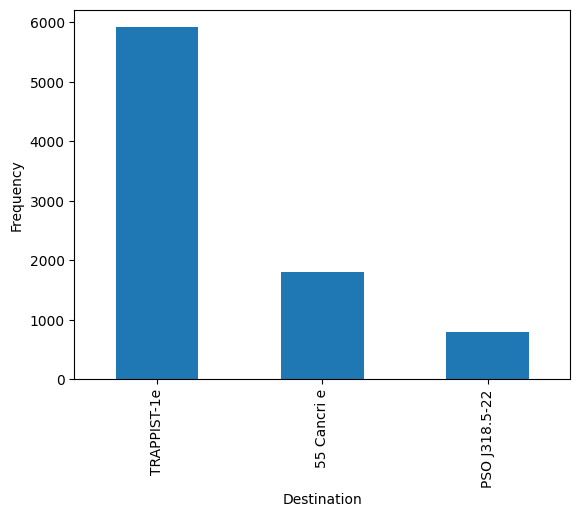

In [ ]:
train.Destination.value_counts().plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.show()

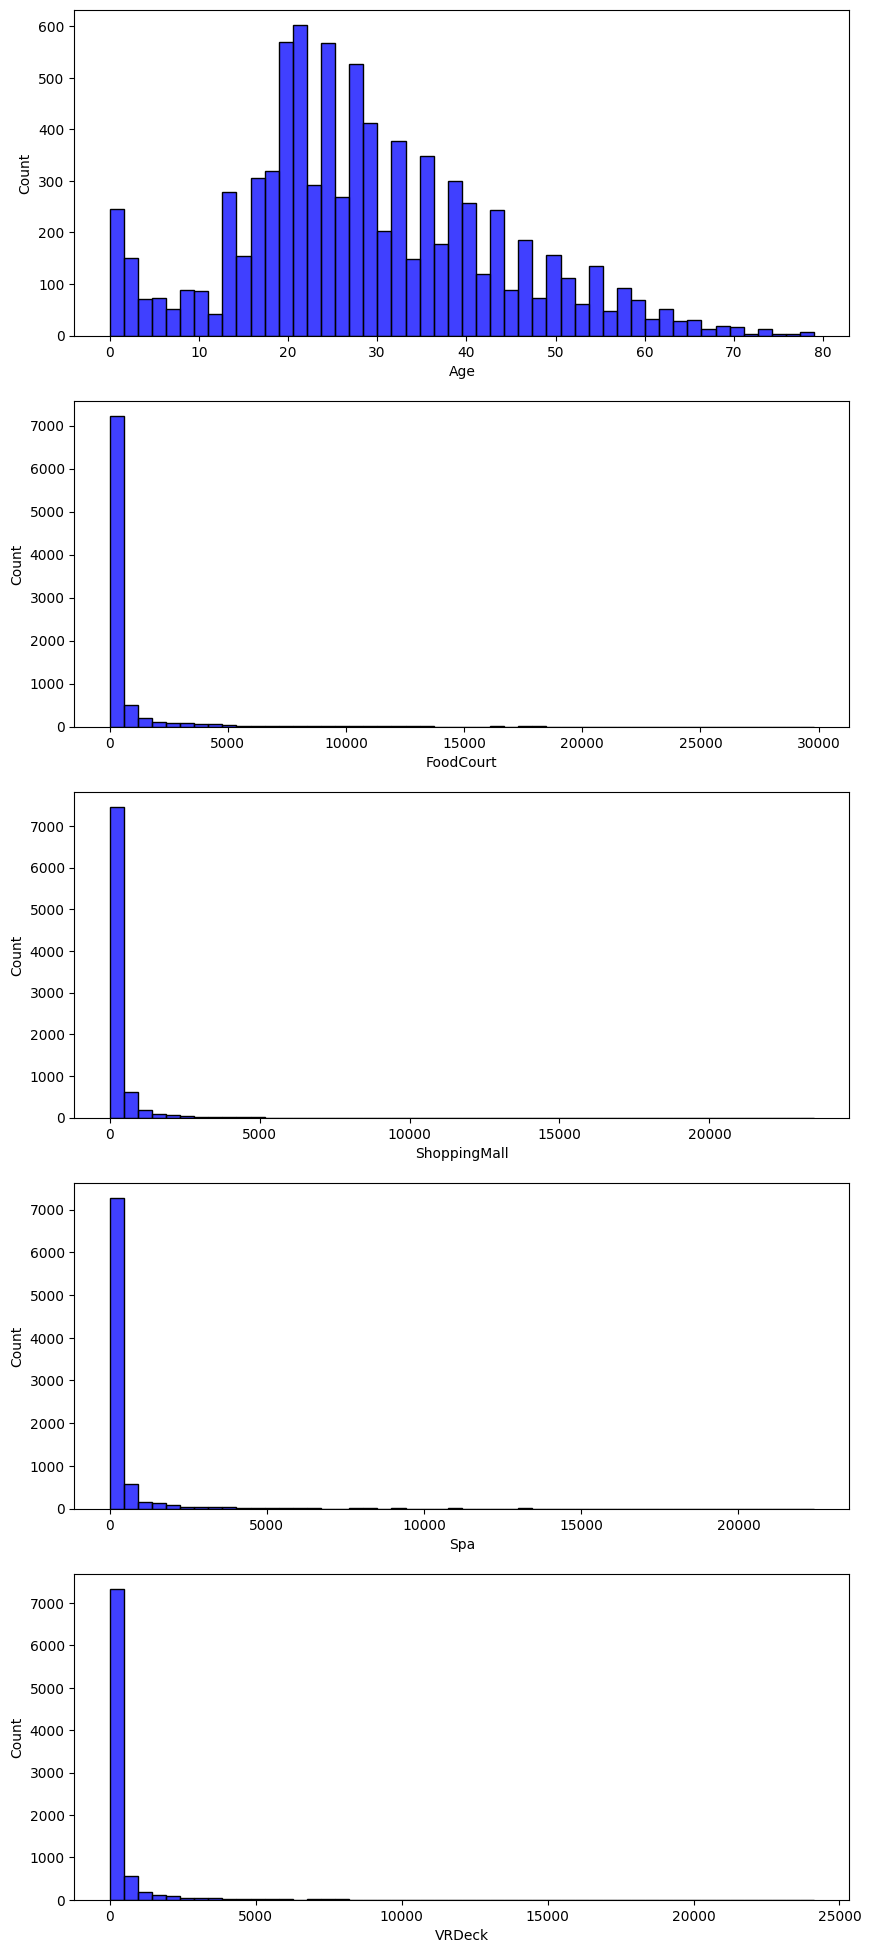

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(train['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(train['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(train['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(train['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(train['VRDeck'], color='b', bins=50, ax=ax[4]);

In [9]:
train[["Deck", "Cabin_num", "Side"]] = train["Cabin"].str.split("/", expand=True)
train = train.drop(['Cabin'], axis=1)

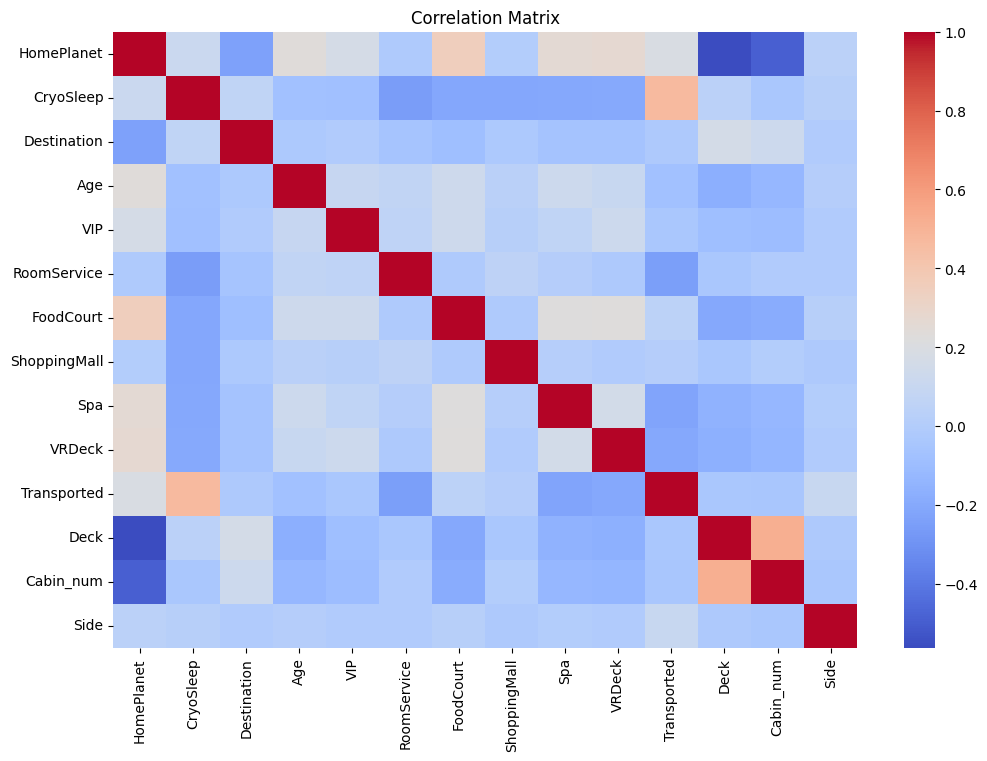

In [ ]:
corr_train = train.drop(['PassengerId', 'Name'], axis=1)
corr_train['HomePlanet'] = corr_train['HomePlanet'].apply(hash)
corr_train['Destination'] = corr_train['Destination'].apply(hash)
corr_train['Deck'] = corr_train['Deck'].apply(hash)
corr_train['Side'] = corr_train['Side'].apply(hash)
correlation_matrix = corr_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
train = train.drop(['PassengerId', 'Name'], axis=1)

## Decision tree realisation


Для реалізації дерева рішень (Decision Tree), спершу реалізуємо методи для пошуку оптимального порогу розбиття та розрахунку Gini impurity.

In [11]:
import numpy as np
import pandas as pd

# Функція для розрахунку Gini impurity
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities**2)

# Функція для пошуку найкращого розбиття
'''def best_split(X, y):
    best_gini = float("inf")
    best_split_value = None
    best_left_y = None
    best_right_y = None
    best_feature = None
    best_left_X = None
    best_right_X = None

    for feature_index in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            left_mask = X[:, feature_index] <= threshold
            right_mask = ~left_mask

            left_y, right_y = y[left_mask], y[right_mask]

            # Якщо одна з частин порожня, пропускаємо розбиття
            if len(left_y) == 0 or len(right_y) == 0:
                continue

            gini = (len(left_y) / len(y)) * gini_impurity(left_y) + (len(right_y) / len(y)) * gini_impurity(right_y)

            if gini < best_gini:
                best_gini = gini
                best_split_value = threshold
                best_left_y = left_y
                best_right_y = right_y
                best_feature = feature_index
                best_left_X = X[left_mask]
                best_right_X = X[right_mask]

    return best_feature, best_split_value, best_left_X, best_right_X, best_left_y, best_right_y'''

def best_split(X, y):
    best_gini = float("inf")
    best_split_value = None
    best_feature = None
    best_left_X = None
    best_right_X = None
    best_left_y = None
    best_right_y = None

    n_samples, n_features = X.shape

    for feature_index in range(n_features):
        # Сортуємо дані за поточною ознакою
        sorted_indices = np.argsort(X[:, feature_index])
        X_sorted = X[sorted_indices]
        y_sorted = y[sorted_indices]

        # Ініціалізація для підрахунку кількості класів зліва та справа
        total_samples = len(y_sorted)
        left_counts = np.zeros_like(np.unique(y, return_counts=True)[1])
        right_counts = np.bincount(y_sorted, minlength=len(left_counts))

        for i in range(1, total_samples):  # Починаємо з другого елемента
            # Оновлюємо кількість класів у лівій і правій частинах
            current_class = y_sorted[i - 1]
            left_counts[current_class] += 1
            right_counts[current_class] -= 1

            # Пропускаємо, якщо значення поточної ознаки повторюється
            if X_sorted[i, feature_index] == X_sorted[i - 1, feature_index]:
                continue

            # Обчислення імпурності
            left_probabilities = left_counts / i
            right_probabilities = right_counts / (total_samples - i)

            gini_left = 1 - np.sum(left_probabilities**2)
            gini_right = 1 - np.sum(right_probabilities**2)

            gini = (i / total_samples) * gini_left + ((total_samples - i) / total_samples) * gini_right

            # Оновлення найкращого розбиття
            if gini < best_gini:
                best_gini = gini
                best_split_value = (X_sorted[i - 1, feature_index] + X_sorted[i, feature_index]) / 2
                best_feature = feature_index

                best_left_X = X_sorted[:i]
                best_right_X = X_sorted[i:]
                best_left_y = y_sorted[:i]
                best_right_y = y_sorted[i:]

    return best_feature, best_split_value, best_left_X, best_right_X, best_left_y, best_right_y



# Рекурсивна функція для створення дерева
def build_tree(X, y, max_depth=None, depth=0):
    if len(np.unique(y)) == 1:
        return np.unique(y)[0]

    if max_depth and depth >= max_depth:
        return np.random.choice(np.unique(y))

    feature, value, left_X, right_X, left_y, right_y = best_split(X, y)

    if feature is None:
        return np.random.choice(np.unique(y))

    left_tree = build_tree(left_X, left_y, max_depth, depth + 1)
    right_tree = build_tree(right_X, right_y, max_depth, depth + 1)

    return {"feature": feature, "value": value, "left": left_tree, "right": right_tree}

# Функція для передбачення класу для одного зразка
def predict_sample(tree, sample):
    while isinstance(tree, dict):
        if sample[tree["feature"]] <= tree["value"]:
            tree = tree["left"]
        else:
            tree = tree["right"]
    return tree

# Функція для передбачення класів для всіх зразків
def predict(tree, X):
    return np.array([predict_sample(tree, sample) for sample in X])


## Random forest model

Тепер, коли ми маємо базове дерево рішень, можна створити Random Forest, який включатиме кілька дерев.

In [12]:
# Створення моделі Random Forest
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            # Bootstrap sampling: випадкова вибірка з поверненням
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            # Побудова дерева
            tree = build_tree(X_sample, y_sample, max_depth=self.max_depth)
            self.trees.append(tree)

    def predict(self, X):
        # Передбачення з усіх дерев
        predictions = np.array([predict(tree, X) for tree in self.trees])
        # Бере переважний клас із всіх дерев
        return np.array([np.bincount(pred).argmax() for pred in predictions.T])


## Data preparation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
# Data Preparation: Fill missing values
# Fill missing numerical features with the median
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train[numerical_features] = train[numerical_features].fillna(train[numerical_features].median())

In [15]:
# Fill missing categorical features with the mode
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
train[categorical_features] = train[categorical_features].fillna(train[categorical_features].mode().iloc[0])

<ipython-input-15-e4bffb0c0e42>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[categorical_features] = train[categorical_features].fillna(train[categorical_features].mode().iloc[0])


In [16]:
# Convert categorical features to numerical using one-hot encoding
train = pd.get_dummies(train, columns=categorical_features)

In [17]:
# This column has type "object" for some reason, so we should fill unknown values and convert it to ineteger value
train['Cabin_num'] = train['Cabin_num'].fillna('-1')
train['Cabin_num'] = train['Cabin_num'].astype(int)

In [18]:
# Define features (X) and target (y)
X = train.drop('Transported', axis=1)
y = train['Transported'].astype(int)  # Convert True/False to 1/0 for the model

In [19]:
train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,False,True,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,False,True,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   bool   
 7   Cabin_num                  8693 non-null   int64  
 8   HomePlanet_Earth           8693 non-null   bool   
 9   HomePlanet_Europa          8693 non-null   bool   
 10  HomePlanet_Mars            8693 non-null   bool   
 11  CryoSleep_False            8693 non-null   bool   
 12  CryoSleep_True             8693 non-null   bool   
 13  Destination_55 Cancri e    8693 non-null   bool 

In [21]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model evaluation



Оскільки ми вже реалізували модель, можемо оцінити її за допомогою метрик точності, звіту по класифікації та матриці плутанини.

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating model with 100 trees, fitting it and trying to predict
model = RandomForest(n_estimators=100, max_depth=10)
model.fit(X_train.values, y_train.values)

y_pred = model.predict(X_val.values)

# Accuracy evaluation
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on Validation Data:", accuracy)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Accuracy on Validation Data: 0.765382403680276

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       863
           1       0.76      0.79      0.77       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739


Confusion Matrix:
[[643 220]
 [188 688]]


## Comparison with other models


In [ ]:
# Model Initialization: Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model on validation data
y_pred = model.predict(X_val)


In [ ]:
# Metrics
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on Validation Data:", accuracy)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy on Validation Data: 0.8108108108108109

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       863
           1       0.84      0.77      0.80       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739


Confusion Matrix:
[[734 129]
 [200 676]]


In [ ]:
from sklearn.impute import SimpleImputer

# Імпутер для числових значень
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Імпутер для категоріальних значень
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Створення імпутерів
numerical_imputer = SimpleImputer(strategy='mean')  # для числових даних використовуємо середнє
categorical_imputer = SimpleImputer(strategy='most_frequent')  # для категоріальних - мода

# Заповнення пропущених значень
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# Заповнення пропущених значень у валідаційних даних
X_val[numerical_cols] = numerical_imputer.transform(X_val[numerical_cols])
X_val[categorical_cols] = categorical_imputer.transform(X_val[categorical_cols])

# Тепер можна запускати тренування моделей:
for model_name, model in models.items():
    print(f"\n--- Testing {model_name} ---")

    # Навчання моделі
    model.fit(X_train, y_train)

    # Передбачення
    y_pred = model.predict(X_val)

    # Обчислення метрик
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    # Збереження результатів
    results[model_name] = accuracy



--- Testing Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       863
           1       0.78      0.80      0.79       876

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739


Confusion Matrix:
[[667 196]
 [178 698]]

--- Testing Gradient Boosting ---
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       863
           1       0.79      0.83      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


Confusion Matrix:
[[672 191]
 [151 725]]

--- Testing SVM ---
Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70 